## Graph data structure
## Copyright: Jagadeesh Vasudevamurthy
## filename:graph.ipynb¶

# All import here

In [7]:
import sys # For getting Python Version
import os
import enum # For enum
import math  # for infinity
from graphviz import Source
print("Version of Python I am using is", sys.version)

Version of Python I am using is 3.13.0 (main, Oct  7 2024, 05:02:14) [Clang 16.0.0 (clang-1600.0.26.4)]


# Graph input and output directory setup
# YOU MUST CHANGE 2 lines below

In [8]:
inputFileBase = "/Users/prachinavale/Documents/INFO_6205-PSA/HW9/graphdata/"
outputFileBase = "/Users/prachinavale/Documents/INFO_6205-PSA/HW9/output/" 

In [9]:
def read_dot_file(f:'string')->'dot_graph':
    filename = outputFileBase + f + ".dot"
    print(filename)
    with open(filename) as f1:
        dot_graph = f1.read()
    print(dot_graph)
    return(dot_graph)

# YOU WRITE CODE HERE

# Graph Interface

In [10]:
###########################################################
# GraphInterface.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2024
###########################################################

############################################################
# You can have any Data. 
# You must writethe routines below 
#   __init__
#   -get_key
#   __str__
#   get_real_name -- name for printing
#   __hash__
#   __lt__
###########################################################
class Data:
    def __init__(self, n: "string"):
        self._name = n  ### _name is used as key for this project
        self.age = 100  ## To show you can have anything,

    def _get_key(self) -> "string":
        return self._name

    def __str__(self) -> "string":
        return self._name

    def get_real_name(self) -> "string":
        return self._name
    
    #'''
    def __hash__(self) -> int:
        k = self._get_key()
        t = hash(k)
        return t

    def __lt__(self, other: "Data") -> "bool":
      if not isinstance(other, type(self)):
          assert False
      n1 = self._get_key()
      n2 = other._get_key()
      return (n1 < n2)
  

    ############################################################
    # Do not change anything below
    ###########################################################
    
    #############################
    # Overload ==
    # (a == b) == !(a < b) && !(b < a)
    #############################
    def __eq__(self, b: "Data") -> "bool":
        return not (self < b) and not (b < self)
    
    #############################
    # Overload >
    # (a > b) = (b < a)
    #############################
    def __gt__(self, b: "Data") -> "bool":
        return b < self

    #############################
    # Overload <=
    # (a <= b) = !(b < a)
    #############################
    def __le__(self, b: "Data") -> "bool":
        return not (b < self)

    #############################
    # Overload >=
    # (a >= b) = !(a < b)
    #############################
    def __ge__(self, b: "Data") -> "bool":
        return not (self < b)
    #############################
    # Overload !=
    # (a != b) == !(a == b)
    #############################
    def __ne__(self, b: "Data") -> "bool":
        return not (self == b)
  
    

 ############################################################
# GraphInterface
###########################################################
class GraphInterface: 
  def __init__(self):
    self._index = 0
    self._dict = {} # Key is item UDT: Value is index (0 to n-1)
    self._list = [] # Given number between 0 to n-1 get Data in O(1) time

  def __len__(self)->'int':
    l = len(self._dict)
    assert(l == self._index)
    return l

  ############################################################
  # If Data d is already there get a unique number
  # If Data d is not there, return -1
  ###########################################################
  def find(self, d:'Data')->'int':
    if (d in self._dict):
      n = self._dict.get(d)
      assert(n >= 0 and n < self._index)
      return n
    return -1
  ############################################################
  # If Data d is already there get a unique number
  # If Data d is not there, return -1
  ###########################################################
  def find_by_name(self, s: 'string') -> int:
    d = Data(s)
    if d in self._dict:
        n = self._dict.get(d)  # Key is Data, Value is the 'index'
        assert n >= 0 and n < self._index
        return n
    return -1
  
  ############################################################
  # If Data d is already there gives a unique number
  # If Data d is not there, stores the data in a dict and returns unique int
  ###########################################################
  def insert(self, d: 'Data') -> int:
    n = self.find(d)
    if n == -1:
        # Not in the dict. Add to dict and to list.
        # Note everything is pointer. Key is Data, Value is the 'int' THETA(1)
        self._dict[d] = self._index
        self._list.append(d)
        n = self._index
        self._index = self._index + 1
    return n


  ############################################################
  # Given an unique int gives user data in THETA(1) time
  ###########################################################
  def __getitem__(self, n:'int')->'string':
    assert(n >= 0 and n < self._index)
    return self._list[n].get_real_name()
  



  

# Graph builder from file

In [11]:
############################################################
# GraphBuilder.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2024
###########################################################

############################################################
# YOU WRITE CODE IN THIS FILE
###########################################################

class GraphBuilder:
    def __init__(self, g: "graph", f: "string"):
        self._g = g
        # graph object
        self._f = f  # File from which you are building graph
        self._g._g = self._build_graph()

    ############################################################
    # Write code: build_graph
    # Use as many private functions and prvate data you want
    ###########################################################
    def _build_graph(self) -> "None":
        notReadline = 0
        readline = 0
        with open(self._f, "r") as file:
            data = file.readlines()
            for aline in data:
                token = aline.split()
                size = len(token)
                if (size < 2) or (size > 3):
                    notReadline = notReadline + 1
                    print("NOT READ LINE", aline)
                    continue
                readline = readline + 1
                tf = token[0]
                tt = token[1]
                if (tf == tt):
                    notReadline = notReadline + 1
                    print("NOT READ LINE", aline)
                    continue

                w = 0
                if size == 3:
                    # Weighted graph
                    tw = token[2]
                    w = float(tw)

                n1 = self._g._data_interface.insert(Data(tf))
                n2 = self._g._data_interface.insert(Data(tt))
                self._g.add_edge(n1, n2, w)



# Write Graph as a dot file

In [12]:
############################################################
# GraphDot.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2024
###########################################################

############################################################
# YOU WRITE CODE IN THIS FILE
###########################################################

class GraphDot:
    def __init__(self, g, f):
        self._g = g  # Handle to graph
        self._f = f  # File where you write graph in dot format
        self._of = open(self._f, "w")
        self._write_dot()
        self._of.close()

    ############################################################
    # Write code: _write_dot
    # Use as many private functions and prvate data you want
    ###########################################################
    def _write_dot(self):
        self._of.write("## Jagadeesh Vasudevamurthy ####\n")
        self._of.write("digraph g {\n")
        t = self._g.get_graph_type()
        print("Remove and WRITE CODE- write dot")
        


# DFS USING TIME STAMP

In [13]:
############################################################
# GraphDfs.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2024
###########################################################

############################################################
# Depth First serach using TimeStamp
###########################################################
class GraphDfsUsingTimeStamp:
    def __init__(
        self,
        g: "graph",
        graph_name: "string",
        dfs_order: "list of Nodes",
        has_loop: "list of size 1",
        work: "list of size 1",
        dfs_traversal_output_file,
    ):
        ##NOTHING CAN BE CHANGED HERE
        self._g = g
        self._graph_name = graph_name
        self._dfs_order = dfs_order
        self._has_loop = has_loop
        self._has_loop[0] = False
        self._work = work
        self._work[0] = 0
        self._dfs_traversal_output_file = dfs_traversal_output_file

        ##YOU CAN has any number of private varibles and funcions
        
        self._dfs()
        self._write_dot()

    ##########################################################
    # Write dot file of DFS traversal
    ##########################################################
    def _write_dot(self):
        of = open(self._dfs_traversal_output_file, "w")
        of.write("## Jagadeesh Vasudevamurthy ####\n")
        of.write("digraph g {\n")
        print("Remove and WRITE CODE-write dot")
        of.close()

    ##########################################################
    # TIME: THETA(V + E)
    # SPACE: O(Largest path) = O(V)
    ##########################################################
    def _dfs(self):
        print("Remove and WRITE CODE")


# Dijkstra Algorithm

In [14]:
############################################################
# GraphDijkstra.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2024
###########################################################

import heapq

############################################################
# Every node has this data structure
###########################################################

############################################################
# self, gname, start_city, cost, work, dijkstra_traversal_dot_output_file
###########################################################
class GraphDijkstra:
    def __init__(
        self,
        g: "graph",
        graph_name: "string",
        start_city_num: "int",
        cost: "list of Nodes",  # FILL: cost from start city to all other city.If not reachable -1
        work: "list of size 1",  # FILL
        Dijkstra_traversal_output_file: "String",
        show: "bool",
    ):
        ##NOTHING CAN BE CHANGED HERE
        self._g = g
        self._gname = graph_name
        self._start_city_num = start_city_num
        self._cost = cost
        self._work = work
        self._work[0] = 0
        self._Dijkstra_traversal_output_file = Dijkstra_traversal_output_file
        self._show = show

        ##YOU CAN has any number of private varibles and funcions
        

        ### MUST WRITE 4 routine for 100 Marks
        self._Dijkstra()
        self._fill_shortest_cost()
        self._print_all_shortest_path_from_starting_city_to_other_cities()
        # self._write_dot()



# BFS

In [ ]:
############################################################
# GraphBfs.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2024
###########################################################

############################################################
# Breadth First search
###########################################################
class GraphBfs:
    def __init__(
        self,
        g: "graph",
        graph_name: "string",
        start_city_num: "int",
        end_city_num:"int",
        shortest_dist:'list of size 1',
        work: "list of size 1",
        bfs_traversal_output_file:"String",
        show: 'bool'
    ):
        ##NOTHING CAN BE CHANGED HERE
        self._g = g
        self._graph_name = graph_name
        self._start_city_num = start_city_num
        self._end_city_num = end_city_num
        self._shortest_dist = shortest_dist
        self._work = work
        self._work[0] = 0
        self._bfs_traversal_output_file = bfs_traversal_output_file
        self._show = show
        ## You can add any private data structures here
        
        ## must write 3 routines
        self._bfs() 
        self._find_shortest_path()
        self._write_dot()

    def _bfs(self):
        num_nodes = self._g.get_numV() 
        self._distances = [-1] * num_nodes 
        self._parents = [-1] * num_nodes  

        # Initialize BFS with the start node
        queue = [self._start_city_num]
        self._distances[self._start_city_num] = 0 

        while queue:
            current = queue.pop(0) 
            self._work[0] += 1 

            # Get the current node and its neighbors
            current_node = self._g._dict[current]
            neighbors = current_node.fanout_of_a_node()  

            for neighbor in neighbors:
                # Explicitly ensure neighbor is an integer
                if isinstance(neighbor, Node):
                    neighbor_num = neighbor.get_num()
                else:
                    neighbor_num = neighbor  

                if self._distances[neighbor_num] == -1:  
                    self._distances[neighbor_num] = self._distances[current] + 1
                    self._parents[neighbor_num] = current  
                    queue.append(neighbor_num)  


    def _find_shortest_path(self):
        if self._distances[self._end_city_num] == -1:
            # If the destination is unreachable
            self._shortest_dist[0] = 999999
            self._path = []
            return

        # Retrieve the shortest distance
        self._shortest_dist[0] = self._distances[self._end_city_num]

        # Reconstruct the path
        self._path = []
        current = self._end_city_num
        while current != -1:
            self._path.append(current)
            current = self._parents[current]
        self._path.reverse()


    def _write_dot(self):
        with open(self._bfs_traversal_output_file, 'w') as f:
            f.write(f'digraph {self._graph_name} {{\n')

            # Write edges from parent to child
            for child, parent in enumerate(self._parents):
                if parent != -1: 
                    f.write(f'    {parent} -> {child};\n')

            f.write('}\n') 

        # Display output if `show` is True
        if self._show:
            print("BFS Tree written to:", self._bfs_traversal_output_file)
            if self._path:
                print("Shortest Path:", " -> ".join(map(str, self._path)))
            else:
                print("Shortest Path: None")
            print("Shortest Distance:", self._shortest_dist[0])

## NOTHING CAN BE CHANGED BELOW

## Graph Types

In [16]:
class GraphType(enum.Enum): 
    NONE = 0
    UNDIRECTED = 1
    DIRECTED = 2
    WEIGHTED_UNDIRECTED = 3
    WEIGHTED_DIRECTED  = 4

## Graph class

In [17]:
############################################################
# Graph.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2024
###########################################################

############################################################
# NOTHING CAN BE CHANGED IN THIS FILE
###########################################################

############################################################
# All imports
###########################################################
import collections
import math  # for infinity

############################################################
# Edge
# Name less data structure
# n is guaranteed to be int from 0 to n-1
###########################################################
class Edge:
    def __init__(self, n: "int", weight: "float"):
        self._other_num = n  # _other node
        self._weight = weight  # _weight is float

    ############################################################
    # All Public routines. YOU SHOULD ONLY CALL THESE ROUTINES
    ###########################################################
    def get_num(self) -> "int":
        return self._other_num

    def get_weight(self) -> "float":
        return self._weight

    def change_weight(self, w: "float") -> "None":
        self._weight = w

############################################################
# Node
# Name less data structure
# n is guaranteed to be int from 0 to n-1
###########################################################
class Node:
    def __init__(self, n: "int"):
        self._num = n 
        self._fanins = {}  # dict of fanins of Node. Key is edge other node num int, Value is Edge
        self._fanouts = {}  # dict of fanouts of Node. Key is edge other node num int, Value is Edge

    ############################################################
    # All Public routines. YOU SHOULD ONLY CALL THESE ROUTINES
    ###########################################################
    def get_num(self) -> "int":
        return self._num

    def add_fan_out(self, e: "Edge") -> "None":
        
        # MADE CHANGES - 1
        key = e.get_num()
        self._fanouts[key] = e

    def add_fan_in(self, e: "Edge") -> "None":
        
        # MADE CHANGES - 1
        key = e.get_num()
        self._fanins[key] = e

    def num_fan_outs(self) -> "int":
        return len(self._fanouts)

    def num_fan_ins(self) -> "int":
        return len(self._fanins)

    def fanout_of_a_node_edges(self) -> "list of fanout edges":
        # l will have edge {num, weights}
        l = list(self._fanouts.values())
        return l

    def fanout_of_a_node(self) -> "list of fanout numbers":
        c = self.get_num()
        l = self.fanout_of_a_node_edges()
        n = []
        # n will have nodes driven except the current. Cannot have self loop
        for edge in l:
            k = edge.get_num()
            assert(k != c) #You will never have self loop
            n.append(k)
        return n

    def fanin_of_a_node_edges(self) -> "list of fanin edges":
        # l will have edge {num, weights}
        l = list(self._fanins.values())
        return l

    def fanin_of_a_node(self) -> "list of fanin Nodes":
        c = self.get_num()
        l = self.fanin_of_a_node_edges()
        n = []
        # n will have nodes driven except the current. Cannot have self loop
        for edge in l:
            k = edge.get_num()
            assert(k != c) #You will never have self loop
            n.append(k)
        return n

    def node_has_fanout_edge(self, e: "Edge") -> "Edge or None":
        
        # MADE CHANGES - 1
        aedge = self._fanouts.get(e)

        if (aedge):
            return aedge
        else: 
            return None

    def get_weight(self, to:"int") ->'float':
        
        # MADE CHANGES - 1
        e = Edge(to, 0)
        se = self.node_has_fanout_edge(e)
        assert(se)

        return se.get_weight()

    def node_has_fanout(self, e: "Edge") -> "int or None":

        # MADE CHANGES - 1
        aedge = self.node_has_fanout_edge.get(e)

        if (aedge):
            return aedge.get_num()
        else: 
            return None

    def node_has_fanin_edge(self, e: "Edge") -> "Edge or None":

        # MADE CHANGES - 1
        aedge = self._fanins.get(e)

        if (aedge):
            return aedge
        else: 
            return None

    def node_has_fanin(self, e: "Edge") -> "Int or None":
        
        # MADE CHANGES - 1
        aedge = self.node_has_fanin_edge.get(e)

        if (aedge):
            return aedge.get_num()
        else: 
            return None
            
    def node_get_fanout_node_weight(self, other_node: "Node") -> "float":

        # MADE CHANGES - 1
        nodenum = self.get_num()
        aedge = self._fanouts.get(other_node)
        edgenum = aedge.get_num()

        assert(nodenum != edgenum)

        return aedge.get_weight()

    def node_get_fanin_node_weight(self, other_node: "Node") -> "float":

        # MADE CHANGES - 1
        nodenum = self.get_num()
        aedge = self._fanins.get(other_node)
        edgenum = aedge.get_num()

        assert(nodenum != edgenum)

        return aedge.get_weight()

class Graph:
    ##GRAPH DATA STRUCTURE
    def __init__(self,graphtype: "GraphType"):
        self._numE = 0  # Number of edges
        self._type = graphtype  # Graph type
        self._dict = {}  #all nodes are in a dictionary
        # Key is int from 0 to n-1. 
        # Value is the Node. 
        # We don't require hash function as key is int
        self._data_interface = GraphInterface()
        
    ############################################################
    # All Public routines. YOU SHOULD ONLY CALL THESE ROUTINES
    ###########################################################
    def get_numV(self) -> "int":
        n = len(self._dict)
        return n

    def get_numE(self) -> "int":
        return self._numE

    def is_directed_graph(self) -> "bool":
        if self._type == GraphType.DIRECTED:
            return True
        if self._type == GraphType.WEIGHTED_DIRECTED:
            return True
        return False

    def is_undirected_graph(self) -> "bool":
        return not (self.is_directed_graph())

    def is_weighted_graph(self) -> "bool":
        if self._type == GraphType.WEIGHTED_UNDIRECTED:
            return True
        if self._type == GraphType.WEIGHTED_DIRECTED:
            return True
        return False

    def get_graph_type(self) -> "GraphType":
        return self._type

    def get_graph_type_as_string(self) -> "string":
        t = self.get_graph_type()
        if t == GraphType.UNDIRECTED:
            return "UNDIRECTED GRAPH"
        if t == GraphType.DIRECTED:
            return "DIRECTED GRAPH"
        if t == GraphType.WEIGHTED_UNDIRECTED:
            return "WEIGHTED_UNDIRECTED GRAPH"
        if t == GraphType.WEIGHTED_DIRECTED:
            return "WEIGHTED_DIRECTED GRAPH"
        return "NONE"

    def list_of_nodes(self) -> "list of nodes":
        # Key is int from 0 to n-1. 
        # Value is the Node. 
        l = list(self._dict.values()) # we get list of all nodes
        return l

    def build_node(self, num:'int') -> "Node":
        n = Node(num)
        return n
    
    def build_node_and_to_graph(self, num:'int') -> "Node":
        n = Node(num)
        self._add_node(n)

    def has_node(self,node:'Node') -> "bool":
        
        # MADE CHANGES - 3
        key = node.get_num()

        if key in self._dict:
            return True
        return False

    def get_node(self,node:'Node')->'Node or None':
        
        # MADE CHANGES - 3
        if self.has_node(node):
            key = node.get_num()

            n = self._dict[key]
            assert(n)

            return n
        return None

    def add_edge(self,f:'int', t:'int', w:'float'):
        f = Node(f)
        t = Node(t)
        self._add_edge(f,t,w)

    def get_real_name(self,i:'int')->'string':
        s = self._data_interface[i]
        return s

    def dump(self, name):
        print("------------", name, "------------ ")
        print(self.get_graph_type())
        print("Num Vertices =", self.get_numV())
        print("Num Edges    =", self._numE)
        numedge = 0
        all_nodes = self.list_of_nodes()

        for node in all_nodes:
            n = node.get_num()
            rn = self.get_real_name(n)
            print(rn, "Fanouts: ", end="")
            f = node.num_fan_outs()

            if (f == 0):
                print("NONE")
            else:
                fanout_nodes = node.fanout_of_a_node()
                l = []

                for fnode in fanout_nodes:
                    numedge = numedge + 1
                    d = fnode.get_num()
                    rd = self.get_real_name(d)
                    l.append(rd)
                print(*l, sep=",")

            print(rn, "Fanins: ", end="")
            f = node.num_fan_ins()

            if (f == 0):
                print("NONE")
            else:
                fanin_nodes = node.fanin_of_a_node()
                l = []

                for fnode in fanin_nodes:
                    numedge = numedge + 1
                    d = fnode.get_num()
                    rd = self.get_real_name(d)
                    l.append(rd)
                print(*l, sep=",")

                 
        assert(numedge / 2 == self._numE)
        

    ##########################################################
    # Nothing can be changed
    # TIME: THETA(V + E)
    # SPACE: THETA(V)
    ##########################################################
    def assert_dfs_passed(self, has_loop: "bool", dfs_order: "list of nodes"):
        t = self.get_graph_type()
        if (t == GraphType.UNDIRECTED) or (t == GraphType.WEIGHTED_UNDIRECTED):
            return
        if has_loop == False:
            set_of_visited_nodes = set()
            for n in dfs_order:
                ## Go on fanins of node
                fanins_of_n = n.fanin_of_a_node()
                for nf in fanins_of_n:
                    must_be_there = nf in set_of_visited_nodes  # find in THETA(1)
                    assert must_be_there
                set_of_visited_nodes.add(n)  # add in THETA(1)
            # All nodes must be visited
            assert len(set_of_visited_nodes) == self.get_numV()
            print("DFS ASSERT PASSED")

    ############################################################
    # All Private routines. YOU SHOULD NOT CALL THESE ROUTINES
    ###########################################################
    def _add_node(self, n:'Node')->"Node":
        storedn = self.get_node(n)
        if (storedn):
          return storedn
        key = n.get_num()
        n = self.build_node(key)
        self._dict[key] = n # Key is unique number int (0 to n-1)
        return n

    def _add_an_edge(self,f:'Node', t:'Node', fanout:'bool', w:'float'):
        f = self._add_node(f)
        t = self._add_node(t)

        # MADE CHANGES - 3
    
        if (fanout):
            e = f.node_has_fanout_edge(t)
            if e:
                ew = e.get_weight()
                if (w < ew):
                    e.change_weight(w)
            else:
                e = Edge(t, w)
                f.add_fan_out(e)
                self._numE = self._numE + 1
        else:
            e = f.node_has_fanin_edge(t)
            if e:
                ew = e.get_weight()
                if (w < ew):
                    e.change_weight(w)
            else:
                e = Edge(t, w)
                f.add_fan_in(e)
        

    def _add_edge(self,f:'Node', t:'Node', w:'float'):
        self._add_an_edge(f,t,True,w) #fanout
        self._add_an_edge(t,f,False,w) #fanin
        if (self._type == GraphType.UNDIRECTED) or (self._type == GraphType.WEIGHTED_UNDIRECTED):
          self._add_an_edge(t,f,True,w) #fanout
          self._add_an_edge(f,t,False,w) #fanin

    ############################################################
    ## All the routines written by students
    ##########################################################
    def build_graph(self, f: "file name"):
        b = GraphBuilder(self, f)  

    def write_dot(self, f):
        b = GraphDot(self, f)

    def show_dot_file(self, filename: "string"):
        with open(filename) as f:
            dot_graph = f.read()
        return dot_graph

    def dfs_using_time_stamp(
        self,
        gname: "string",
        dfs_order: "list of nodes",
        has_loop: "List of size 1 Boolean",
        work: "list of size 1",
        dfs_dot_output_file: "Traversal file name",
    ):

        b = GraphDfsUsingTimeStamp(
            self, gname, dfs_order, has_loop, work, dfs_dot_output_file
        )

    def bfs(
        self,
        gname: "graphname",
        start: "start city num",
        endt: "end city num",
        dist: "list of size 1",
        work: "list of size 1",
        ofile: "bfs_traversal_output_file",
        show: "bool",
    ):
        b = GraphBfs(self, gname, start, endt, dist, work, ofile, show)

    def Dijkstra(
        self,
        gname: "string",
        start_city_num: "int",
        cost: "list of cost",  # Caller will Fill. cost from start city to all other city.If not reachable -1
        work: "list of size 1",
        dijkstra_traversal_dot_output_file: "Traversal file name",
        show: "bool",
    ):
        b = GraphDijkstra(
            self,
            gname,
            start_city_num,
            cost,
            work,
            dijkstra_traversal_dot_output_file,
            show,
        )

    def DP(
        self,
        gname: "string",
        start_city_num: "int",
        cost: "list of cost",  # Caller will Fill. cost from start city to all other city.If not reachable -1
        work: "list of size 1",
        dijkstra_traversal_dot_output_file: "Traversal file name",
        show: "bool",
    ):
        b = GraphDPShortestPath(
            self,
            gname,
            start_city,
            cost,
            work,
            dijkstra_traversal_dot_output_file,
            show,
        )


# DFS TESTER

In [18]:
############################################################
# GraphDfsTest.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2024
###########################################################

class GraphDfsTest:
    def __init__(self):
        self._show = False  # Change to True for debugging
        self._test_one()
        self._test()

    def _test1(self, gname: "graphname", graphtype: "GraphType", expected_has_loop: "Bool"):
        full_name = inputFileBase + gname + ".txt"

        print("Building graph", full_name)
        g = Graph(graphtype)
        g.build_graph(full_name)
        if self._show:
            g.dump(full_name)

        dot_output_file = outputFileBase + gname + ".dot"
        g.write_dot(dot_output_file)

        dfs_order = []  # Caller will Fill. List of Nodes
        has_loop = [False]  # List of size 1
        work = [0]  # List of size 1
        dfs_dot_output_file = outputFileBase + gname + "dfs.dot"
        g.dfs_using_time_stamp(gname, dfs_order, has_loop, work, dfs_dot_output_file)

        print("DFS traversal is in")
        print(dfs_dot_output_file)

        print("DFS ORDER: ", end=" ")
        for node in dfs_order:
            p1 = node.get_num()
            rp1 = g.get_real_name(p1)
            print(rp1, end=" ")
        print()

        if has_loop[0]:
            print("LOOP")
        else:
            print("NOLOOP")
        print("Work Done", work[0])
        assert has_loop[0] == expected_has_loop
        g.assert_dfs_passed(has_loop[0],dfs_order)

    def _test_one(self):
        g = [
            ["1", GraphType.UNDIRECTED, False],
        ]

        for g1 in g:
            self._test1(g1[0], g1[1], g1[2])

    def _test(self):
        g = [
            ["u1", GraphType.UNDIRECTED, False],
            ["1", GraphType.UNDIRECTED, False],
            ["udf1", GraphType.DIRECTED, True],
            ["2", GraphType.DIRECTED, False],
            ["3", GraphType.DIRECTED, True],
            ["cat", GraphType.DIRECTED, False],
            ["7", GraphType.DIRECTED, False],
        ]

        for g1 in g:
            self._test1(g1[0], g1[1], g1[2])


# BFS Tester

In [19]:
############################################################
# GraphBfsTest.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2024
###########################################################

class GraphBfsTest:
    def __init__(self):
        self._show = False  # Change to True for debugging
        self._test_one()
        self._test()

    def _test1(self, gname: "graphname", graphtype: "GraphType", start: "start city name", endt: "end city name",edist:'int',show:'bool'):
        full_name = inputFileBase + gname + ".txt"
        print("Building graph", full_name)
        g = Graph(graphtype)
        g.build_graph(full_name)
        if self._show:
            g.dump(full_name)

        dot_output_file = outputFileBase + gname + ".dot"
        g.write_dot(dot_output_file)
        dist =[999999] #Distance from start city to end city.9999999 indicates no path
        work = [0]  # List of size 1
        bfs_traversal_output_file = outputFileBase + gname + "bfs.dot"
        ns = g._data_interface.find_by_name(start)
        assert(ns != -1)
        nd = g._data_interface.find_by_name(endt)
        assert(nd != -1)
        g.bfs(gname,ns,nd, dist, work,bfs_traversal_output_file, show) ;
        if (dist[0] == 999999):
          print("dist INF")
        else:
          print("dist", dist[0])
        assert(work[0] > 0)
        assert(dist[0] == edist)
        print("Work Done", work[0])
        print("Shortest Distance from",start, "to",endt, "is", dist[0])
        

    def _test_one(self):
        g = [
            ["7",GraphType.DIRECTED,"0","6",2,True]
        ]
        for g1 in g:
          self._test1(g1[0], g1[1], g1[2],g1[3],g1[4],g1[5])

    def _test(self):
        g = [
            ["5",GraphType.UNDIRECTED,"0","6",3,True], #name, directed/undirected, startcity, endcity,expected distance,show
            ["cat",GraphType.DIRECTED,"Cab","Bat",2,True],
            ["7",GraphType.DIRECTED,"0","6",2,True],
            ["3",GraphType.DIRECTED,"0","4",3,True], #This graph has a loop
            ["3",GraphType.DIRECTED,"4","0",999999,True],#This graph has a loop and you cannot go to many cities
            ["HD6",GraphType.DIRECTED,"8","42",2,True],
            ["wiki",GraphType.DIRECTED,"25","7273",5,False],
            ["chatgpt1",GraphType.UNDIRECTED,"124","723",5,True],
            ["chatgpt2",GraphType.DIRECTED,"0","30",24,True],
            ["chatgpt2",GraphType.UNDIRECTED,"0","30",3,True],
            ["graphwithloop",GraphType.DIRECTED,"0","11",4,True],
        ]
        for g1 in g:
          self._test1(g1[0], g1[1], g1[2],g1[3],g1[4],g1[5])
 

# Dijkstra Tester

In [20]:
############################################################
# GraphDijkstraTest.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2024
###########################################################

class GraphGraphDijkstraTest:
    def __init__(self):
        self._show = False  # Change to True for debugging
        self._test()

    def _test(self):
        n = ["dag_graph_3_columns_500","dag_graph_3_columns","7","7", "loopparallel", "17", "hd1", "hd2", "hd3", "g1", "hd4", "hd5","hd6"]
        t = [
            GraphType.WEIGHTED_DIRECTED,
            GraphType.WEIGHTED_DIRECTED,
            GraphType.WEIGHTED_DIRECTED,
            GraphType.WEIGHTED_DIRECTED,
            GraphType.WEIGHTED_UNDIRECTED,
            GraphType.WEIGHTED_UNDIRECTED,
            GraphType.WEIGHTED_UNDIRECTED,
            GraphType.WEIGHTED_UNDIRECTED,
            GraphType.WEIGHTED_UNDIRECTED,
            GraphType.WEIGHTED_DIRECTED,
            GraphType.WEIGHTED_UNDIRECTED,
            GraphType.WEIGHTED_UNDIRECTED,
            GraphType.WEIGHTED_UNDIRECTED,
        ]
        s = ["0","0","0","4", "s", "A", "17", "60", "85", "P", "49","1","1"]  # starting city
        wdag_graph_3_columns_500 = [0, 7.0, 8.0, 10.0, 10.0, 4.0, 5.0, 1.0, 4.0, 7.0, 10.0, 6.0, 5.0, 6.0, 2.0, 3.0, 10.0, 4.0, 3.0, 1.0, 6.0, 3.0, 2.0, 2.0, 1.0, 4.0, 4.0, 1.0, 5.0, 3.0, 3.0, 4.0, 2.0, 3.0, 3.0, 3.0, 4.0, 2.0, 3.0, 3.0, 2.0, 3.0, 4.0, 3.0, 4.0, 4.0, 4.0, 3.0, 3.0, 1.0, 4.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 4.0, 3.0, 3.0, 2.0, 5.0, 1.0, 3.0, 2.0, 2.0, 1.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 1.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 1.0, 1.0, 2.0, 2.0, 3.0, 4.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 1.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 4.0, 4.0, 3.0, 2.0, 2.0, 3.0, 3.0, 1.0, 3.0, 1.0, 3.0, 2.0, 2.0, 3.0, 2.0, 3.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, -1, -1, -1, 13.0, 15.0, -1, 16.0, 16.0, 16.0, -1, 5.0, 2.0, 10.0, 9.0, 9.0, 9.0, 4.0, 6.0, 8.0, 8.0, 9.0, 7.0, 5.0, 4.0, 6.0, 4.0, 3.0, 4.0, 4.0, 5.0, 5.0, 3.0, 5.0, 4.0, 6.0, 4.0, 5.0, 5.0, 6.0, 4.0, 4.0, 3.0, 2.0, 3.0, 5.0, 2.0, 4.0, 2.0, 2.0, 4.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 2.0, 4.0, 3.0, 3.0, 2.0, 4.0, 2.0, 4.0, 3.0, 3.0, 3.0, 3.0, 4.0, 2.0, 3.0, 3.0, 4.0, 3.0, 4.0, 3.0, 2.0, 4.0, 2.0, 3.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 2.0, 3.0, 2.0, 2.0, 3.0, 2.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, -1, -1, 19.0, 10.0, 6.0, 8.0, 2.0, 8.0, 5.0, 10.0, 2.0, 3.0, 7.0, 2.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 3.0, 4.0, 3.0, 5.0, 4.0, 4.0, 3.0, 2.0, 4.0, 3.0, 4.0, 3.0, 2.0, 4.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 4.0, 2.0, 3.0, 2.0, 3.0, 2.0, 2.0, 3.0, 3.0, 3.0, 2.0, 3.0, -1, 5.0, 9.0, 9.0, 9.0, 3.0, 3.0, 4.0, 3.0, 6.0, 6.0, 5.0, 5.0, 4.0, 3.0, 3.0, 4.0, 4.0, 3.0, 2.0, 4.0, 3.0, 5.0, 2.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 2.0, 2.0, 4.0, 3.0, 4.0, 2.0, 3.0, 2.0, 3.0, 2.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 16.0, 9.0, 8.0, 9.0, 7.0, 5.0, 5.0, 6.0, 4.0, 3.0, 4.0, 4.0, 5.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 2.0, 4.0, 3.0, 2.0, 2.0, 3.0, 5.0, 4.0, 4.0, 3.0, 4.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, -1, 16.0, 11.0, 8.0, 4.0, 4.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 8.0, 8.0, 4.0, 3.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 6.0, 5.0, 2.0, 2.0, 2.0, 4.0, 3.0, 4.0, 3.0, 3.0, 2.0, 5.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 3.0, 4.0, 11.0, 3.0, 2.0, 3.0, 3.0]
        wdag_graph_3_columns =  [0, 10.0, 1.0, 5.0, 9.0, 1.0, 1.0, 1.0, 1.0, 2.0, 7.0, 14.0, 13.0, 12.0, 10.0, 9.0, 4.0, 5.0, -1, 19.0, 16.0, 19.0, 10.0, 2.0, -1, 19.0, 2.0, 19.0, 8.0, 4.0, 3.0, 4.0, 5.0, 18.0, 21.0, 11.0, 10.0, -1, -1, 20.0, 14.0, 23.0, 3.0, 5.0, -1, 4.0, 13.0, 3.0, -1, 10.0]
        w0 = [0.0, 5.0, 3.0, 9.0, 13.0, 8.0, 7.0]
        w1 = [-1, -1, -1, -1, 5.0, 0, -1]
        w2 = [0.0, 1.0, 6.0, 7.0]  
        w3 = [2.0, 7.0, 5.0, 1.0, 3.0, 7.0, 0.0]
        w4 = [
            20.0,
            22.0,
            25.0,
            27.0,
            25.0,
            68.0,
            86.0,
            39.0,
            70.0,
            36.0,
            53.0,
            91.0,
            35.0,
            88.0,
            30.0,
            43.0,
            0.0,
            54.0,
            74.0,
            41.0,
        ]
        w5 = [
            9.0,
            13.0,
            8.0,
            10.0,
            8.0,
            5.0,
            8.0,
            5.0,
            12.0,
            1.0,
            7.0,
            15.0,
            4.0,
            8.0,
            9.0,
            4.0,
            11.0,
            1.0,
            4.0,
            12.0,
            9.0,
            11.0,
            7.0,
            9.0,
            10.0,
            9.0,
            7.0,
            10.0,
            5.0,
            10.0,
            11.0,
            9.0,
            1.0,
            7.0,
            12.0,
            6.0,
            12.0,
            15.0,
            10.0,
            11.0,
            15.0,
            6.0,
            10.0,
            7.0,
            9.0,
            7.0,
            7.0,
            14.0,
            5.0,
            13.0,
            8.0,
            8.0,
            10.0,
            7.0,
            4.0,
            6.0,
            3.0,
            8.0,
            11.0,
            11.0,
            12.0,
            4.0,
            9.0,
            9.0,
            7.0,
            7.0,
            7.0,
            0.0,
            13.0,
            6.0,
            7.0,
            8.0,
            8.0,
            3.0,
            5.0,
            6.0,
            11.0,
            5.0,
        ]
        w6 = [
            154.0,
            98.0,
            90.0,
            49.0,
            186.0,
            190.0,
            178.0,
            114.0,
            123.0,
            -1.0,
            -1.0,
            -1.0,
            123.0,
            -1.0,
            104.0,
            -1.0,
            -1.0,
            -1.0,
            207.0,
            134.0,
            123.0,
            75.0,
            155.0,
            -1.0,
            198.0,
            68.0,
            90.0,
            170.0,
            135.0,
            -1.0,
            103.0,
            145.0,
            -1.0,
            54.0,
            111.0,
            163.0,
            173.0,
            115.0,
            87.0,
            159.0,
            -1.0,
            94.0,
            102.0,
            -1.0,
            76.0,
            67.0,
            167.0,
            138.0,
            216.0,
            -1.0,
            172.0,
            102.0,
            212.0,
            163.0,
            103.0,
            112.0,
            -1.0,
            182.0,
            145.0,
            92.0,
            -1.0,
            -1.0,
            194.0,
            -1.0,
            182.0,
            -1.0,
            201.0,
            96.0,
            -1.0,
            85.0,
            121.0,
            108.0,
            161.0,
            130.0,
            100.0,
            120.0,
            -1.0,
            118.0,
            215.0,
            92.0,
            156.0,
            162.0,
            163.0,
            168.0,
            0.0,
            71.0,
            110.0,
            -1.0,
            -1.0,
            190.0,
            217.0,
            100.0,
            105.0,
            178.0,
        ]
        w7 = [0.0, 1.0, 4.0, 4.0, 2.0, 3.0]

        h4 = [13.0, 20.0, 30.0, 17.0, 17.0, 34.0, 33.0, 16.0, 16.0, 9.0, 11.0, 31.0, 21.0, 34.0, 19.0, 14.0, 23.0, 20.0, 42.0, 21.0, 15.0, 19.0, 24.0, 15.0, 34.0, 42.0, 27.0, 0, 10.0, 15.0, 16.0, 18.0, 19.0, 18.0, 14.0, 21.0, 21.0, 28.0, 21.0, 19.0, 45.0, 26.0, 27.0, 20.0, 16.0, 23.0, 28.0, 22.0, 27.0, 18.0, 22.0, 21.0, 11.0, 18.0, 22.0, 14.0, 26.0, 27.0, 27.0, 17.0, 24.0, 17.0, 17.0, 22.0, 12.0, 21.0, 10.0, 25.0]          
        h5 = [0, 8.0, 3.0, 11.0, 6.0, 8.0, 7.0, 6.0, 12.0, 12.0, 10.0, 9.0, 18.0, 12.0, 4.0, 8.0, 1.0, 3.0, 1.0, 2.0, 10.0, 8.0, 5.0, 6.0, 9.0, 17.0, 11.0, 8.0]
        h6 = [0, 6.0, 3.0, 3.0, 4.0, 3.0, 5.0, 3.0, 3.0, 4.0, 6.0, 5.0, 5.0, 4.0, 4.0, 1.0, 4.0, 5.0, 7.0, 6.0, 6.0, 4.0, 4.0, 4.0, 1.0, 4.0, 5.0, 7.0, 5.0, 2.0, 4.0, 5.0, 5.0, 3.0, 5.0, 6.0, 5.0, 4.0, 5.0, 3.0, 5.0, 5.0, 6.0, 4.0, 5.0, 5.0, 3.0, 6.0, 6.0, 5.0, 3.0, 6.0, 7.0, 5.0, 2.0, 6.0, 6.0, 4.0, 4.0, 3.0, 4.0, 5.0, 3.0, 6.0, 5.0, 3.0, 3.0, 4.0, 7.0, 2.0, 4.0, 6.0, 5.0, 2.0, 2.0, 6.0, 4.0, 6.0, 4.0, 5.0, 3.0, 4.0, 4.0, 4.0, 2.0, 1.0, 3.0, 3.0]
        
        w = [wdag_graph_3_columns_500,wdag_graph_3_columns,w0, w1, w2, w3, w4, w5, w6,w7,h4,h5,h6]

        n1 = len(n)
        t1 = len(t)
        s1 = len(s)
        d1 = len(w)
        assert n1 == t1
        assert n1 == s1
        assert n1 == d1
        for i in range(n1):
            gname = n[i]
            start_city = s[i]
            expected_cost_array = w[i]
            print("------------- ", gname, " ------------")
            full_name = inputFileBase + gname + ".txt"
            g = Graph(t[i])
            g.build_graph(full_name)
            #g.dump_as_list()
            if self._show:
                #g.dump_as_list()
                g.dump(full_name)
                dot_output_file = outputFileBase + gname + ".dot"
                g.write_dot(dot_output_file)

            cost = (
                []
            )  # Caller will Fill. cost from start city to all other city.If not reachable -1
            work = [0]  # List of size 1
            dijkstra_traversal_dot_output_file = outputFileBase + gname + "dijkstra.dot"
            show = True
            if g.get_numV() < 21:
                show = True
            ns = g._data_interface.find_by_name(start_city)
            assert(ns != -1)
            g.Dijkstra(
                gname, ns, cost, work, dijkstra_traversal_dot_output_file, show
            )
            # assert answers
            print("Expected cost = ", expected_cost_array)
            print("Your answer    = ", cost)
            assert len(cost) == len(expected_cost_array)
            x = 0
            for j in range(len(cost)):
                if cost[j] != expected_cost_array[j]:
                    x = x + 1
            print("Failed ", x)
            assert x == 0  # NO failure can happen


# Graph Representation Tester

In [21]:
############################################################
# GraphRepresentationTest.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2024
###########################################################

class GraphRepresentationTest:
    def __init__(self):
        self._test()

    def _u1(self):
        name = "13"
        f = inputFileBase + name + ".txt"
        g = Graph(GraphType.UNDIRECTED)
        g.build_graph(f)
        g.dump(name)
        file = outputFileBase + name + ".dot"
        g.write_dot(file)
        # Source(read_dot_file(name))
        print("numV =  ", g.get_numV())
        print("numE = ", g.get_numE())
        assert g.get_numV() == 7
        assert g.get_numE() == 24

    def _uw1(self):
        name = "14"
        f = inputFileBase + name + ".txt"
        g = Graph(GraphType.WEIGHTED_UNDIRECTED)
        g.build_graph(f)
        g.dump(name)
        file = outputFileBase + name + ".dot"
        g.write_dot(file)
        # Source(read_dot_file(name))
        assert g.get_numV() == 6
        assert g.get_numE() == 20

    def _d1(self):
        name = "15"
        f = inputFileBase + name + ".txt"
        g = Graph(GraphType.DIRECTED)
        g.build_graph(f)
        g.dump(name)
        file = outputFileBase + name + ".dot"
        g.write_dot(file)
        # Source(read_dot_file(name))
        assert g.get_numV() == 6
        assert g.get_numE() == 6

    def _dw1(self):
        name = "16"
        f = inputFileBase + name + ".txt"
        g = Graph(GraphType.WEIGHTED_DIRECTED)
        g.build_graph(f)
        g.dump(name)
        file = outputFileBase + name + ".dot"
        g.write_dot(file)
        # Source(read_dot_file(name))
        assert g.get_numV() == 5
        assert g.get_numE() == 6

    def _DAG(self):
        name = "cat"
        f = inputFileBase + name + ".txt"
        g = Graph(GraphType.DIRECTED)
        g.build_graph(f)
        g.dump(name)
        # g.show_graph()
        file = outputFileBase + name + ".dot"
        g.write_dot(file)
        # Source(read_dot_file(name))
        assert g.get_numV() == 6
        assert g.get_numE() == 7

    def _loop(self):
        name = "loopparallel"
        f = inputFileBase + name + ".txt"
        g = Graph(GraphType.WEIGHTED_DIRECTED)
        g.build_graph(f)
        g.dump(name)
        # g.show_graph()
        file = outputFileBase + name + ".dot"
        g.write_dot(file)
        # Source(read_dot_file(name))
        print("numV =  ", g.get_numV())
        print("numE = ", g.get_numE())
        assert g.get_numV() == 4
        assert g.get_numE() == 3

    def _test(self):
        self._u1()
        self._uw1()
        self._d1()
        self._dw1()
        self._DAG()
        self._loop()


# Graph tester

In [22]:
############################################################
# GraphTest.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2024
###########################################################

############################################################
# All imports
###########################################################
import sys  # For getting Python Version
import enum

class GraphTest:
    def __init__(self):
        pass

    def RepresentationTest(self):
        t = GraphRepresentationTest()

    def DFS(self):
        t = GraphDfsTest()

    def BFS(self):
        t = GraphBfsTest()

    def Dijkstra(self):
        t = GraphGraphDijkstraTest()


############################################################
# main
# YOU CANNOT CHANGE ANYTHING BELOW
###########################################################
def main():
    print(sys.version)
    t = GraphTest()
    a = [1, 0, 1, 0]
    if a[0]:
        t.RepresentationTest()
        print("test_graph_representation Passed")
    if a[1]:
        t.DFS()
        print("DFS Passed")
    if a[2]:
        t.BFS() #must fix. Not  completely coded
        print("BFS Passed")
    if a[3]:
        t.Dijkstra()
        print("Dijkstra Passed. You are genius if all tests are passed")
        print("Can you rate me at: https://www.linkedin.com/in/jagadeesh-vasudevamurthy-6796591/")


############################################################
# start up
###########################################################
if __name__ == "__main__":
    main()
    if False:
        Source(read_dot_file("13"))
        Source(read_dot_file("14"))
        Source(read_dot_file("15"))
        Source(read_dot_file("16"))
        Source(read_dot_file("cat"))


3.13.0 (main, Oct  7 2024, 05:02:14) [Clang 16.0.0 (clang-1600.0.26.4)]
------------ 13 ------------ 
GraphType.UNDIRECTED
Num Vertices = 7
Num Edges    = 24
1 Fanouts: 2,3,4
1 Fanins: 2,3,4
2 Fanouts: 1,5,4
2 Fanins: 1,5,4
3 Fanouts: 1,6,4
3 Fanins: 1,6,4
4 Fanouts: 1,2,3,5,7,6
4 Fanins: 1,2,3,5,7,6
5 Fanouts: 2,4,7
5 Fanins: 2,4,7
6 Fanouts: 3,7,4
6 Fanins: 3,7,4
7 Fanouts: 4,5,6
7 Fanins: 4,5,6
Remove and WRITE CODE- write dot
numV =   7
numE =  24
------------ 14 ------------ 
GraphType.WEIGHTED_UNDIRECTED
Num Vertices = 6
Num Edges    = 20
1 Fanouts: 2,3,4
1 Fanins: 2,3,4
2 Fanouts: 1,3,5
2 Fanins: 1,3,5
3 Fanouts: 1,2,4,5,6
3 Fanins: 1,2,4,5,6
4 Fanouts: 1,3,6
4 Fanins: 1,3,6
5 Fanouts: 2,3,6
5 Fanins: 2,3,6
6 Fanouts: 3,4,5
6 Fanins: 3,4,5
Remove and WRITE CODE- write dot
------------ 15 ------------ 
GraphType.DIRECTED
Num Vertices = 6
Num Edges    = 6
A Fanouts: B
A Fanins: NONE
B Fanouts: C
B Fanins: A,D
E Fanouts: F,D
E Fanins: C
F Fanouts: NONE
F Fanins: E
D Fanouts: B
D Fa

# Main

In [1]:
############################################################
# main
# YOU CANNOT CHANGE ANYTHING BELOW
###########################################################
def main():
    print(sys.version)
    t = GraphTest()
    a = [1, 0, 1, 0]
    if a[0]:
        t.RepresentationTest()
        print("test_graph_representation Passed")
    if a[1]:
        t.DFS()
        print("DFS Passed")
    if a[2]:
        t.BFS() #must fix. Not  completely coded
        print("BFS Passed")
    if a[3]:
        t.Dijkstra()
        print("Dijkstra Passed. You are genius if all tests are passed")
        print("Can you rate me at: https://www.linkedin.com/in/jagadeesh-vasudevamurthy-6796591/")


# call Main

In [24]:
############################################################
# start up
###########################################################
if (__name__  == '__main__'):
      main()

3.13.0 (main, Oct  7 2024, 05:02:14) [Clang 16.0.0 (clang-1600.0.26.4)]
------------ 13 ------------ 
GraphType.UNDIRECTED
Num Vertices = 7
Num Edges    = 24
1 Fanouts: 2,3,4
1 Fanins: 2,3,4
2 Fanouts: 1,5,4
2 Fanins: 1,5,4
3 Fanouts: 1,6,4
3 Fanins: 1,6,4
4 Fanouts: 1,2,3,5,7,6
4 Fanins: 1,2,3,5,7,6
5 Fanouts: 2,4,7
5 Fanins: 2,4,7
6 Fanouts: 3,7,4
6 Fanins: 3,7,4
7 Fanouts: 4,5,6
7 Fanins: 4,5,6
Remove and WRITE CODE- write dot
numV =   7
numE =  24
------------ 14 ------------ 
GraphType.WEIGHTED_UNDIRECTED
Num Vertices = 6
Num Edges    = 20
1 Fanouts: 2,3,4
1 Fanins: 2,3,4
2 Fanouts: 1,3,5
2 Fanins: 1,3,5
3 Fanouts: 1,2,4,5,6
3 Fanins: 1,2,4,5,6
4 Fanouts: 1,3,6
4 Fanins: 1,3,6
5 Fanouts: 2,3,6
5 Fanins: 2,3,6
6 Fanouts: 3,4,5
6 Fanins: 3,4,5
Remove and WRITE CODE- write dot
------------ 15 ------------ 
GraphType.DIRECTED
Num Vertices = 6
Num Edges    = 6
A Fanouts: B
A Fanins: NONE
B Fanouts: C
B Fanins: A,D
E Fanouts: F,D
E Fanins: C
F Fanouts: NONE
F Fanins: E
D Fanouts: B
D Fa

# Uncomment Only Lines 

In [ ]:
# Source(read_dot_file("13"))

In [ ]:
# Source(read_dot_file("14"))

In [ ]:
# Source(read_dot_file("15"))

In [ ]:
# Source(read_dot_file("16"))

In [ ]:
# Source(read_dot_file("cat"))

In [ ]:
# Source(read_dot_file("loopparallel"))

# BFS Travel

/Users/prachinavale/Documents/INFO_6205-PSA/HW9/output/7bfs.dot
digraph 7 {
    0 -> 1;
    0 -> 2;
    0 -> 3;
    3 -> 4;
    1 -> 5;
    1 -> 6;
}



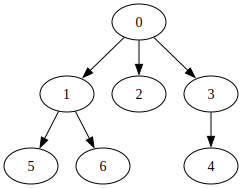

In [25]:
Source(read_dot_file("7bfs"))

/Users/prachinavale/Documents/INFO_6205-PSA/HW9/output/5bfs.dot
digraph 5 {
    1 -> 0;
    0 -> 2;
    1 -> 3;
    3 -> 4;
    3 -> 5;
    4 -> 6;
    4 -> 7;
}



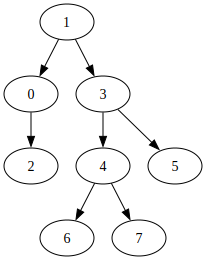

In [26]:
Source(read_dot_file("5bfs"))

/Users/prachinavale/Documents/INFO_6205-PSA/HW9/output/3bfs.dot
digraph 3 {
    4 -> 2;
    2 -> 3;
}



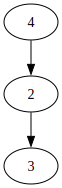

In [40]:
Source(read_dot_file("3bfs"))

/Users/prachinavale/Documents/INFO_6205-PSA/HW9/output/catbfs.dot
digraph cat {
    3 -> 0;
    5 -> 1;
    2 -> 3;
    5 -> 4;
    2 -> 5;
}



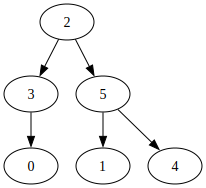

In [27]:
Source(read_dot_file("catbfs"))

/Users/prachinavale/Documents/INFO_6205-PSA/HW9/output/HD6bfs.dot
digraph HD6 {
    12 -> 0;
    29 -> 1;
    12 -> 2;
    12 -> 3;
    36 -> 4;
    75 -> 5;
    29 -> 6;
    18 -> 7;
    18 -> 8;
    18 -> 9;
    13 -> 10;
    22 -> 11;
    12 -> 13;
    12 -> 14;
    18 -> 15;
    22 -> 16;
    18 -> 17;
    12 -> 18;
    18 -> 19;
    12 -> 20;
    12 -> 21;
    12 -> 22;
    12 -> 23;
    12 -> 24;
    13 -> 25;
    12 -> 26;
    12 -> 27;
    75 -> 28;
    12 -> 29;
    67 -> 30;
    36 -> 31;
    18 -> 32;
    13 -> 33;
    21 -> 34;
    75 -> 35;
    12 -> 36;
    18 -> 37;
    21 -> 38;
    23 -> 39;
    36 -> 40;
    22 -> 41;
    18 -> 42;
    36 -> 43;
    18 -> 44;
    18 -> 45;
    36 -> 46;
    12 -> 47;
    12 -> 48;
    13 -> 49;
    12 -> 50;
    13 -> 51;
    18 -> 52;
    36 -> 53;
    67 -> 54;
    75 -> 55;
    48 -> 56;
    36 -> 57;
    18 -> 58;
    85 -> 59;
    13 -> 60;
    36 -> 61;
    13 -> 62;
    29 -> 63;
    20 -> 64;
    12 -> 65;
    18 -> 66;
    12

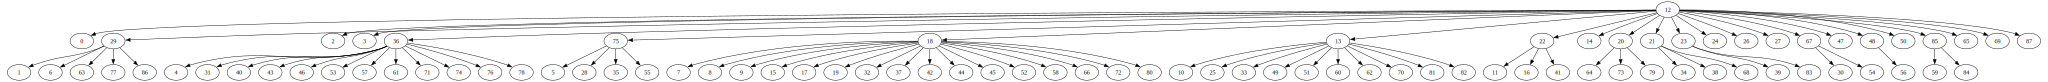

In [28]:
Source(read_dot_file("HD6bfs"))

In [29]:
Source(read_dot_file("chatgpt1bfs"))

/Users/prachinavale/Documents/INFO_6205-PSA/HW9/output/chatgpt1bfs.dot
digraph chatgpt1 {
    408 -> 0;
    343 -> 1;
    356 -> 2;
    451 -> 3;
    681 -> 4;
    702 -> 5;
    681 -> 6;
    237 -> 7;
    39 -> 8;
    286 -> 9;
    527 -> 10;
    10 -> 11;
    704 -> 12;
    350 -> 13;
    127 -> 14;
    798 -> 15;
    484 -> 16;
    28 -> 17;
    10 -> 18;
    323 -> 19;
    787 -> 20;
    487 -> 21;
    236 -> 22;
    909 -> 23;
    23 -> 24;
    671 -> 25;
    27 -> 26;
    665 -> 27;
    578 -> 28;
    393 -> 29;
    32 -> 30;
    515 -> 31;
    538 -> 32;
    631 -> 33;
    102 -> 34;
    472 -> 35;
    113 -> 36;
    323 -> 37;
    631 -> 38;
    113 -> 39;
    27 -> 40;
    94 -> 41;
    469 -> 42;
    528 -> 43;
    301 -> 44;
    782 -> 45;
    578 -> 46;
    500 -> 47;
    436 -> 48;
    48 -> 49;
    78 -> 50;
    198 -> 51;
    338 -> 52;
    634 -> 53;
    913 -> 54;
    408 -> 55;
    501 -> 56;
    56 -> 57;
    59 -> 58;
    578 -> 59;
    421 -> 60;
    538 -> 61;
   

In [30]:
Source(read_dot_file("chatgpt2bfs"))

/Users/prachinavale/Documents/INFO_6205-PSA/HW9/output/chatgpt2bfs.dot
digraph chatgpt2 {
    445 -> 0;
    0 -> 1;
    821 -> 2;
    239 -> 3;
    445 -> 4;
    897 -> 5;
    92 -> 6;
    489 -> 7;
    404 -> 8;
    217 -> 9;
    436 -> 10;
    103 -> 11;
    778 -> 12;
    671 -> 13;
    220 -> 14;
    931 -> 15;
    747 -> 16;
    103 -> 17;
    62 -> 18;
    220 -> 19;
    528 -> 20;
    928 -> 21;
    634 -> 22;
    821 -> 23;
    181 -> 24;
    3 -> 25;
    239 -> 26;
    416 -> 27;
    432 -> 28;
    517 -> 29;
    922 -> 30;
    83 -> 31;
    104 -> 32;
    445 -> 33;
    641 -> 34;
    83 -> 35;
    778 -> 36;
    313 -> 37;
    239 -> 38;
    612 -> 39;
    305 -> 40;
    349 -> 41;
    786 -> 42;
    778 -> 43;
    308 -> 44;
    939 -> 45;
    103 -> 46;
    165 -> 47;
    548 -> 48;
    404 -> 49;
    197 -> 50;
    787 -> 51;
    404 -> 52;
    209 -> 53;
    62 -> 54;
    83 -> 55;
    257 -> 56;
    568 -> 57;
    103 -> 58;
    100 -> 59;
    103 -> 60;
    62 -> 61;
 

In [31]:
Source(read_dot_file("wikibfs"))

/Users/prachinavale/Documents/INFO_6205-PSA/HW9/output/wikibfs.dot
digraph wiki {
    29 -> 0;
    0 -> 1;
    0 -> 2;
    0 -> 3;
    0 -> 4;
    0 -> 5;
    29 -> 6;
    29 -> 7;
    6 -> 8;
    29 -> 9;
    6 -> 10;
    29 -> 11;
    6 -> 12;
    29 -> 13;
    29 -> 14;
    29 -> 15;
    29 -> 16;
    29 -> 17;
    29 -> 18;
    29 -> 19;
    29 -> 20;
    6 -> 21;
    6 -> 22;
    6 -> 23;
    6 -> 24;
    29 -> 25;
    29 -> 26;
    29 -> 27;
    6 -> 28;
    29 -> 30;
    29 -> 31;
    29 -> 32;
    29 -> 33;
    29 -> 34;
    29 -> 35;
    29 -> 36;
    29 -> 37;
    29 -> 38;
    29 -> 39;
    29 -> 40;
    29 -> 41;
    29 -> 42;
    29 -> 43;
    29 -> 44;
    29 -> 45;
    29 -> 46;
    29 -> 47;
    29 -> 48;
    29 -> 49;
    29 -> 50;
    29 -> 51;
    29 -> 52;
    29 -> 53;
    29 -> 54;
    29 -> 55;
    29 -> 56;
    29 -> 57;
    29 -> 58;
    29 -> 59;
    29 -> 60;
    29 -> 61;
    29 -> 62;
    29 -> 63;
    29 -> 64;
    29 -> 65;
    29 -> 66;
    29 -> 67;
   

/Users/prachinavale/Documents/INFO_6205-PSA/HW9/output/graphwithloopbfs.dot
digraph graphwithloop {
    0 -> 1;
    0 -> 2;
    1 -> 3;
    1 -> 4;
    1 -> 5;
    3 -> 6;
    4 -> 7;
    2 -> 8;
    5 -> 9;
    4 -> 10;
    7 -> 11;
}



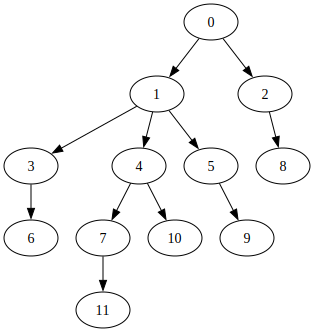

In [32]:
Source(read_dot_file("graphwithloopbfs"))

# DFS TRAVERSAL

In [33]:
#Source(read_dot_file("u1dfs"))

In [34]:
# Source(read_dot_file("1dfs"))

In [35]:
# Source(read_dot_file("udf1dfs"))

In [36]:
# Source(read_dot_file("2dfs"))

In [37]:
# Source(read_dot_file("3dfs"))

In [38]:
# Source(read_dot_file("catdfs"))

In [39]:
# Source(read_dot_file("7dfs"))